In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc # for font
# from matplotlib import font_manager
# from matplotlib.ticker import FormatStrFormatter
import os
import pandas as pd
import re # For getting number from a string
import seaborn as sns
# from palettable.colorbrewer.sequential import Blues_9_r

%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
def get_number(filename):
    num_str = filename.split('_')[-1].split('.')[0]
    num_str = ''.join(filter(str.isdigit, num_str))
    return int(num_str)

In [14]:
# Paths
#diffusion_coefficient = 1
param_group_id = 0
parent_dir = "/projects/epibolyImg_jstark/ModAndSim/student_project_paramOpt/git_clone_parameter_search_morphogen_gradient/diffusion_1D_line/build/"
input_folder = "output_1D_SDD_" + str(param_group_id)
path_to_files = parent_dir + "/" + input_folder + "/gradients/param_set_0/"
path_plot_output = "/projects/epibolyImg_jstark/ModAndSim/student_project_paramOpt/git_clone_parameter_search_morphogen_gradient/plots/plots_gradients/"

In [15]:
# Get max concentration to normalize plot
# Fetch all files in path
fileNames = os.listdir(path_to_files)
# Filter file name list
fileNames = [file for file in fileNames if 'iteration' in file]

In [16]:
fileNames
os.listdir(path_to_files)

['iteration_7199.csv',
 'iteration_22027.csv',
 'iteration_54859.csv',
 'iteration_76365.csv',
 'iteration_89865.csv',
 'iteration_49786.csv',
 'iteration_73994.csv',
 'iteration_4608.csv',
 'iteration_57877.csv',
 'iteration_33652.csv',
 'iteration_88749.csv',
 'iteration_65709.csv',
 'iteration_88226.csv',
 'iteration_75798.csv',
 'iteration_65041.csv',
 'iteration_37707.csv',
 'iteration_7936.csv',
 'iteration_54535.csv',
 'iteration_7989.csv',
 'iteration_71042.csv',
 'iteration_12684.csv',
 'iteration_14831.csv',
 'iteration_22045.csv',
 'iteration_19307.csv',
 'iteration_32071.csv',
 'iteration_58612.csv',
 'iteration_78207.csv',
 'iteration_17477.csv',
 'iteration_50349.csv',
 'iteration_87.csv',
 'iteration_10149.csv',
 'iteration_29807.csv',
 'iteration_83059.csv',
 'iteration_24902.csv',
 'iteration_17015.csv',
 'iteration_70684.csv',
 'iteration_49954.csv',
 'iteration_75058.csv',
 'iteration_35172.csv',
 'iteration_63014.csv',
 'iteration_85879.csv',
 'iteration_10820.csv',

In [18]:
# Sort file names by number
fileNames = sorted(fileNames, key=get_number)
# Determine the maximum iteration
indices = [int(re.findall(r'\d+', file)[0]) for file in fileNames]
iter_max = np.max(indices)

file_id_max = 'iteration_' + str(iter_max) + '.csv'
gradient_id_max = np.genfromtxt(path_to_files + "/" + file_id_max, delimiter=',')
c_max = np.max(gradient_id_max[:,1])
print("c_max = ", c_max)

dt = 0.000125976
dx = 0.031746
j_min = 0
j_max = -1
y_margin = 0.0


t_max = iter_max * dt
print("t_max = ", t_max/60.0, " min")

c_max =  0.094307
t_max =  0.1962769068  min


In [19]:
legend_title = "parameter set index"
# colors = ['gray', 'lightseagreen', 'indigo', 'orange']

## AV gradient for different stages

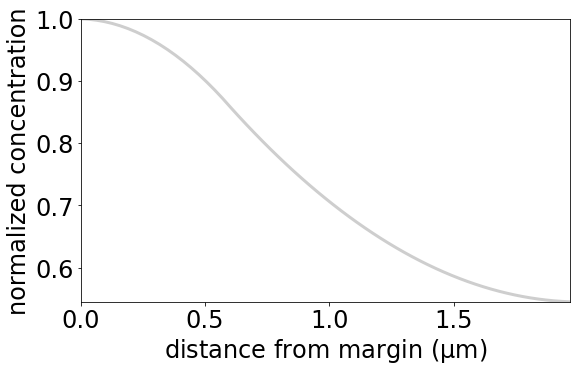

In [20]:
# Create figure and axes objects
# fig, ax = plt.subplots(2, 2)
fig, ax = plt.subplots(1, 1, squeeze=False)
ax = ax.flatten()
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.tight_layout(pad=10) # padding for space between plots

# Set the font style
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif" : "Arial",
    'mathtext.default': 'regular'
})

# Fontsize
myFontsize = 24
myLineWidth = 3
epsilon = 1e-15 # to avoid division by zero when normalizing by volume

# fraction = 'uTotal_4fractions'
# fraction = 'uTotal_ECS'
# fraction = 'uTotal_ECS_AV'
y_label = "normalized concentration"

time = iter_max * dt / 60.0 # time of iteration in minutes



############################################################################################################

# Loop over tests and plot gradient at same iteration for all tests
# for ID_timepoint, timepoint in enumerate(timepoints):
    
    # Set y-margin for axis coordinate origin
#     j_min = int(y_margin_slice[ID_timepoint])
#     j_max = -1
    
    # Set your path to the folder containing the .csv files
#     output_folder_name = "output_TP" + str(timepoint) + "_de_novo_tmax3600_paramSet1";
#     PATH = grandparent_dir +  "/" + simulation_type + "/TP" + str(timepoint) + '/build/' + output_folder_name + '/profiles/' + fraction + '/'

cmap = plt.cm.get_cmap('Greys', len(indices)+1)
cbar_min=indices[0]; cbar_max=indices[-1]; cbar_step=1;
# bounds = np.arange(cbar_min-0.5*cbar_step, cbar_max+1.5*cbar_step, cbar_step)
bounds = np.arange(cbar_min, cbar_max, cbar_step)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
# for ID_param_set, param_set in enumerate(fileNames):
ID_param_set = iter_max
param_set = fileNames[ID_param_set]

PATH = path_to_files + "/" + param_set
# Read .csv file and append to list
df = np.genfromtxt(PATH, delimiter=',')  

# Get c_max of current profile to normalize each profile to its respective c_max
c_max = np.max(df[:,1])

# Add a line and specify the color using the ScalarMappable object
ax[0].plot(df[j_min:j_max, 0] - y_margin, df[j_min:j_max, 1]/c_max, label=str(ID_param_set), color=mappable.to_rgba(ID_param_set), linewidth=myLineWidth)


############################################################################################################
# Add x and y axis limits, labels, and tick-label size
#     ax[id_folder].set_ylim([0,0.3])
ax[0].set_xlabel('distance from margin ($\mu m$)', fontsize=myFontsize, fontname='Arial')
ax[0].set_ylabel(y_label, fontsize=myFontsize, fontname='Arial')
ax[0].margins(x=0, y=0)
ax[0].tick_params(axis='both', which='major', labelsize=myFontsize)
# ax[0].set_title('$\mathit{t} = $' + str(round(time, 2)) + ' min', fontsize=myFontsize, x = 0.55, y=1.0, pad=-30)

# ax[0].legend(fontsize=myFontsize, bbox_to_anchor=(1.04, 0.5), loc="center left")

# Swap order of legend items so that they are ordered by value
# handles, labels = plt.gca().get_legend_handles_labels() #get handles and labels
# order = [0, 1, 2, 3] #specify order of items in legend
# legend = ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=myFontsize, bbox_to_anchor=(1.0, 1.0), loc="upper right") #add legend to plot
# ax[0].get_legend().set_title(legend_title)
# legend.get_title().set_fontsize(myFontsize)
None

# fig.savefig(path_plot_output + "profiles_3stages_normalized" + str(fraction) + "_insetLegend.pdf", bbox_inches = 'tight')